Import data from MAGIC Gamma Telescope dataset 

In [ ]:
# add pd to the path
import sys
# import pandas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  ConfusionMatrixDisplay,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

# read dataset magic04.data
read_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data', header=None)
# add column names
read_data.columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
# balance the dataset by undersampling the majority class g
# count the number of instances of each class
read_data['class'].value_counts()
# print the number of instances of each class
print(read_data['class'].value_counts())
read_data.describe()

g    12332
h     6688
Name: class, dtype: int64


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


# Data Balancing

The Data is class imbalanced with **g** being the majority class. To restore balance, we will undersample **g** to restore the balance.

In [ ]:
# get the indices of the majority class g
indices = read_data[read_data['class'] == 'g'].index
# get the size of the minority class h
sizeh = len(read_data[read_data['class'] == 'h'])
sizeg = len(read_data[read_data['class'] == 'g'])
# randomly sample the indices of the majority class g
indices = np.random.choice(indices, sizeg-sizeh, replace=False)
# delete from the majority class g
read_data = read_data.drop(indices)
print(read_data['class'].value_counts())
read_data.describe()

g    6688
h    6688
Name: class, dtype: int64


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000
mean,57.364366,23.701023,2.842411,0.379456,0.214909,-7.535062,7.528819,0.261996,31.470657,195.331933
std,47.090973,20.882330,0.477726,0.186009,0.113113,65.418608,56.392035,23.248765,27.009958,76.579839
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.565400,11.693175,2.494900,0.232300,0.126600,-23.993475,-14.742725,-11.041500,7.339825,142.117325
50%,38.612200,17.223300,2.754000,0.354650,0.196700,2.748800,14.457000,0.362950,23.444100,193.480000
75%,76.602950,26.349525,3.122275,0.506825,0.287600,23.520725,34.811900,11.105350,52.687500,243.102750
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


Split your dataset randomly so that the training set would form 70% of the dataset and
the testing set would form 30% of it.

In [ ]:
# split into features and labels
features = read_data.drop(columns='class')
labels = read_data['class']
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0, stratify=labels,shuffle=True)
# print the number of instances of each class in the training set

# print the number of instances of each class in the test set
y_train.value_counts()
# print(labels_test['class'].value_counts())
#labels_train.describe()

h    4682
g    4681
Name: class, dtype: int64

In [ ]:
# remove a random point from h class
indices = y_train[y_train == 'h'].index
indices = np.random.choice(indices, 1, replace=False)
X_train = X_train.drop(indices)
y_train = y_train.drop(indices)
# print the number of instances of each class in the training set
y_train.value_counts()



h    4681
g    4681
Name: class, dtype: int64

In [ ]:
def evaluate(X_test, y_test, model):
    y_pred= model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return y_pred, accuracy, precision, recall, f1


# Tuning and training



## Naive Bayes

Training

Naive Bayes Accuracy:  64.5651632195365 %
Naive Bayes Precision:  69.42562803545118 %
Naive Bayes Recall:  64.5651632195365 %
Naive Bayes F1 score:  62.196399611065345 %


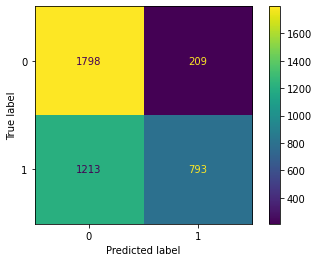

In [ ]:
Naive_Bayes = GaussianNB()
Naive_Bayes.fit(X_train, y_train)
naive_y_pred, naive_accuracy, naive_precision, naive_recall, naive_f1 = evaluate(X_test,y_test, Naive_Bayes)
print("Naive Bayes Accuracy: ", naive_accuracy*100, "%")
print("Naive Bayes Precision: ", naive_precision*100, "%")
print("Naive Bayes Recall: ", naive_recall*100, "%")
print("Naive Bayes F1 score: ", naive_f1*100, "%")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, naive_y_pred))
disp.plot()
plt.show()

In [ ]:
# print(cross_val_score(Naive_Bayes, X_train, y_train, cv=5, scoring = 'accuracy'))

## Decision Tree

### Training

Decision Tree Accuracy:  78.51981061549964 %
Decision Tree Precision:  78.52116177013176 %
Decision Tree Recall:  78.51981061549964 %
Decision Tree F1 score:  78.51953050773405 %


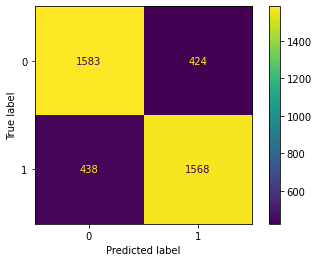

In [ ]:
Decision_tree=DecisionTreeClassifier()
Decision_tree.fit(X_train,y_train)
decision_tree_y_pred, decision_tree_accuracy, decision_tree_precision, decision_tree_recall, decision_tree_f1 = evaluate(X_test,y_test, Decision_tree)
print("Decision Tree Accuracy: ", decision_tree_accuracy*100, "%")
print("Decision Tree Precision: ", decision_tree_precision*100, "%")
print("Decision Tree Recall: ", decision_tree_recall*100, "%")
print("Decision Tree F1 score: ", decision_tree_f1*100, "%")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, decision_tree_y_pred))
disp.plot()
plt.show()


In [ ]:
import graphviz
from sklearn import tree
tree.export_graphviz(Decision_tree, out_file='tree.dot', feature_names=features.columns, class_names=labels.unique(), filled=True, rounded=True, special_characters=True)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## K-Nearest Neighbors (K-NN)

### Tuning

#### Manual Cross Validation

In [ ]:
# # split data into 10 folds for cross validation 
# # split data by class
# # get the indices of the majority class g
# indices_g = y_train[read_data['class'] == 'g'].index
# indices_h = y_train[read_data['class'] == 'h'].index
# # get data using the indices
# X_data_g = X_train.loc[indices_g]
# y_data_g = y_train.loc[indices_g]
# X_data_h = X_train.loc[indices_h]
# y_data_h = y_train.loc[indices_h]
# X_data_h.describe()
# kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
# # split data into 10 folds and store them in 10 lists
# X_train_g_list = []
# X_train_h_list = []
# y_train_g_list = []
# y_train_h_list = []
# X_test_g_list = []
# X_test_h_list = []
# y_test_g_list = []
# y_test_h_list = []

# for train_index, test_index in kf.split(X_data_g, y_data_g):
#     X_train_g_k, X_test_g_k = X_data_g.iloc[train_index], X_data_g.iloc[test_index]
#     y_data_g_k, y_test_g_k = y_data_g.iloc[train_index], y_data_g.iloc[test_index]
#     X_train_g_list.append(X_train_g_k)
#     y_train_g_list.append(y_data_g_k)
#     X_test_g_list.append(X_test_g_k)
#     y_test_g_list.append(y_test_g_k)
# for train_index, test_index in kf.split(X_data_h, y_data_h):
#     X_train_h_k, X_test_h_k = X_data_h.iloc[train_index], X_data_h.iloc[test_index]
#     y_data_h_k, y_test_h_k = y_data_h.iloc[train_index], y_data_h.iloc[test_index]
#     X_train_h_list.append(X_train_h_k)
#     y_train_h_list.append(y_data_h_k)
#     X_test_h_list.append(X_test_h_k)
#     y_test_h_list.append(y_test_h_k)

# # check class distribution in each fold
# for i in range(10):
#     print("Fold ", i)
#     print(y_train_g_list[i].value_counts())
#     print(y_train_h_list[i].value_counts())
#     print(y_test_g_list[i].value_counts())
#     print(y_test_h_list[i].value_counts())



# # # KNN cross validation list
# knn_accuracy_list = []
# knn_precision_list = []
# knn_recall_list = []
# knn_f1_list = []
# for i in range(1,1000,10):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn_accuracy = 0
#     knn_precision = 0
#     knn_recall = 0
#     knn_f1 = 0
#     for j in range(10):
#         X_train_g = X_train_g_list[j]
#         X_train_h = X_train_h_list[j]
#         X_train_Kcross = pd.concat([X_train_g, X_train_h])
#         y_train_g = y_train_g_list[j]
#         y_train_h = y_train_h_list[j]
#         y_train_Kcross = pd.concat([y_train_g, y_train_h])
#         X_test_g = X_test_g_list[j]
#         X_test_h = X_test_h_list[j]
#         X_test_Kcross = pd.concat([X_test_g, X_test_h])
#         y_test_g = y_test_g_list[j]
#         y_test_h = y_test_h_list[j]
#         y_test_Kcross = pd.concat([y_test_g, y_test_h])
#         knn.fit(X_train_Kcross, y_train_Kcross)
#         knn_y_pred_s, knn_accuracy_s, knn_precision_s, knn_recall_s, knn_f1_s = evaluate(X_test_Kcross, y_test_Kcross, knn)
#         knn_accuracy+=knn_accuracy_s
#         knn_precision+=knn_precision_s
#         knn_recall+=knn_recall_s
#         knn_f1+=knn_f1_s

        
#     knn_accuracy_list.append(knn_accuracy/10)
#     knn_precision_list.append(knn_precision/10)
#     knn_recall_list.append(knn_recall/10)
#     knn_f1_list.append(knn_f1/10)

In [ ]:
# # use matplotlib to plot the accuracy, precision, recall and f1 score
# plt.plot(range(1,1000,10), knn_accuracy_list, label='accuracy')
# plt.plot(range(1,1000,10), knn_precision_list, label='precision')
# plt.plot(range(1,1000,10), knn_recall_list, label='recall')
# plt.plot(range(1,1000,10), knn_f1_list, label='f1 score')
# plt.xlabel('k')
# plt.ylabel('score')
# plt.legend()
# plt.show()

In [ ]:
# knn_accuracy_list

#### Cross Validation using cross_val_score

In [ ]:
knn_accuracy_list = []
for i in range(1,1000,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn_accuracy_list.append(cross_val_score(knn, X_train, y_train, cv=10))
# knn.fit(X_train,y_train)



In [ ]:
# get the mean of each fold
knn_accuracy_list_mean = []
for i in range(100):
    knn_accuracy_temp = 0
    for j in range(10):
        # add up the accuracy of each fold
        knn_accuracy_temp+=knn_accuracy_list[i][j]
    # get the mean of each fold
    knn_accuracy_list_mean.append(knn_accuracy_temp/10)

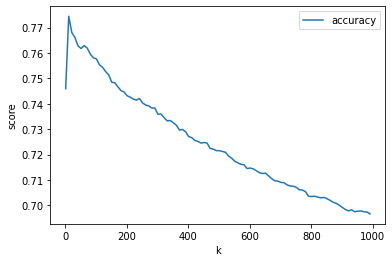

In [ ]:
plt.plot(range(1,1000,10), knn_accuracy_list_mean, label='accuracy')
plt.xlabel('k')
plt.ylabel('score')
plt.legend()
plt.show()

In [ ]:
knn_accuracy_list = []
for i in range(1,50,1):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn_accuracy_list.append(cross_val_score(knn, X_train, y_train, cv=10))

In [ ]:
# get the mean of each fold
knn_accuracy_list_mean = []
for i in range(49):
    knn_accuracy_temp = 0
    for j in range(10):
        # add up the accuracy of each fold
        knn_accuracy_temp+=knn_accuracy_list[i][j]
    # get the mean of each fold
    knn_accuracy_list_mean.append(knn_accuracy_temp/10)

In [ ]:
plt.plot(range(1,50,1), knn_accuracy_list_mean, label='accuracy')
plt.xlabel('k')
plt.ylabel('score')
plt.legend()
plt.show()

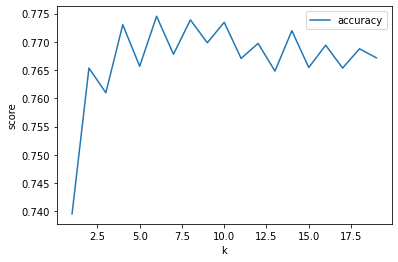

In [ ]:
plt.plot(range(1,20,1), knn_accuracy_list_mean[0:20], label='accuracy')
plt.xlabel('k')
plt.ylabel('score')
plt.legend()
plt.show()

knn Accuracy:  76.700722651383 %
knn Precision:  77.3229596523928 %
knn Recall:  76.700722651383 %
knn F1 score:  76.56668716912594 %


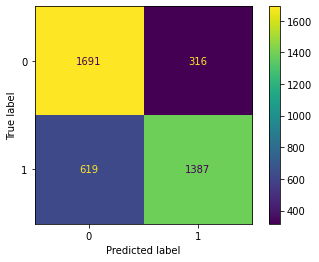

In [ ]:
knn=KNeighborsClassifier(7)
knn.fit(X_train,y_train)
knn_y_pred, knn_accuracy, knn_precision, knn_recall, knn_f1 = evaluate(X_test,y_test, knn)
print("knn Accuracy: ", knn_accuracy*100, "%")
print("knn Precision: ", knn_precision*100, "%")
print("knn Recall: ", knn_recall*100, "%")
print("knn F1 score: ", knn_f1*100, "%")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, knn_y_pred))
disp.plot()
plt.show()

## AdaBoost


### Tuning

In [ ]:

AdaBoost_accuracy_list = []
for i in range(1,1000,10):
  AdaBoost=AdaBoostClassifier(n_estimators=i, random_state=0)
  AdaBoost_accuracy_list.append(cross_val_score(AdaBoost, X_train, y_train, cv=10))
  



In [ ]:
# get the mean of each fold
AdaBoost_accuracy_list_mean = []
for i in range(100):
    AdaBoost_accuracy_temp = 0
    for j in range(10):
        # add up the accuracy of each fold
        AdaBoost_accuracy_temp+=AdaBoost_accuracy_list[i][j]
    # get the mean of each fold
    AdaBoost_accuracy_list_mean.append(AdaBoost_accuracy_temp/10)

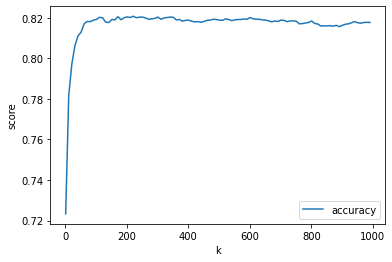

In [ ]:
plt.plot(range(1,1000,10), AdaBoost_accuracy_list_mean, label='accuracy')
plt.xlabel('k')
plt.ylabel('score')
plt.legend()
plt.show()

In [ ]:
AdaBoost_accuracy_list = []
for i in range(150,170,1):
  AdaBoost=AdaBoostClassifier(n_estimators=i, random_state=0)
  AdaBoost_accuracy_list.append(cross_val_score(AdaBoost, X_train, y_train, cv=5))
  


In [ ]:
# get the mean of each fold
AdaBoost_accuracy_list_mean = []
for i in range(19):
    AdaBoost_accuracy_temp = 0
    for j in range(5):
        # add up the accuracy of each fold
        AdaBoost_accuracy_temp+=AdaBoost_accuracy_list[i][j]
    # get the mean of each fold
    AdaBoost_accuracy_list_mean.append(AdaBoost_accuracy_temp/5)

In [ ]:
AdaBoost_accuracy_list_mean

[0.8172606906055918,
 0.8175813175079059,
 0.8187560178150142,
 0.8176880980738428,
 0.8182221720262298,
 0.8174743087783665,
 0.818008268648952,
 0.8188627983809511,
 0.8192898636037984,
 0.8188627983809511,
 0.8186491231672758,
 0.8186490661263752,
 0.8187559037332128,
 0.8192898636037984,
 0.8181148210512866,
 0.8172603483601882,
 0.8174741946965653,
 0.81726051948289,
 0.8173674141306282]

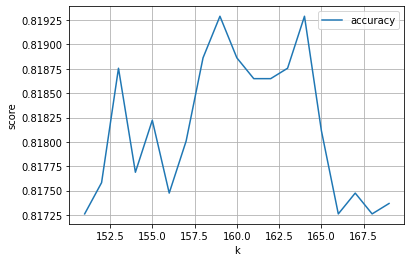

In [ ]:
plt.plot(range(151,170,1), AdaBoost_accuracy_list_mean, label='accuracy')
plt.xlabel('k')
plt.ylabel('score')
plt.legend()
plt.grid()
plt.show()

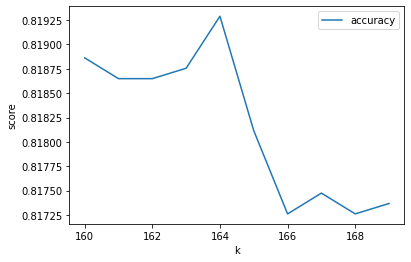

In [ ]:
plt.plot(range(160,170,1), AdaBoost_accuracy_list_mean[9:20], label='accuracy')
plt.xlabel('k')
plt.ylabel('score')
plt.legend()
plt.show()

### Training

AdaBoost Accuracy:  82.00847246449041 %
AdaBoost Precision:  82.00860860818892 %
AdaBoost Recall:  82.00847246449041 %
AdaBoost F1 score:  82.00845905812022 %


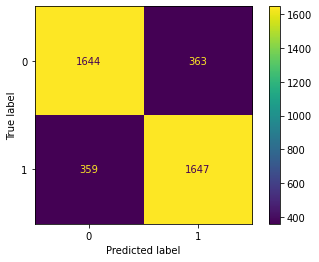

In [ ]:
AdaBoost=AdaBoostClassifier(n_estimators=164, random_state=0)
AdaBoost.fit(X_train,y_train)
AdaBoost_y_pred, AdaBoost_accuracy, AdaBoost_precision, AdaBoost_recall, AdaBoost_f1 = evaluate(X_test,y_test, AdaBoost)
print("AdaBoost Accuracy: ", AdaBoost_accuracy*100, "%")
print("AdaBoost Precision: ", AdaBoost_precision*100, "%")
print("AdaBoost Recall: ", AdaBoost_recall*100, "%")
print("AdaBoost F1 score: ", AdaBoost_f1*100, "%")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, AdaBoost_y_pred))
disp.plot()
plt.show()

In [ ]:
RandomForests_accuracy_list = []
for i in range(1,1000,10):
  RandomForests=RandomForestClassifier(max_depth=i, random_state=0)
  RandomForests_accuracy_list.append(cross_val_score(RandomForests, X_train, y_train, cv=10))
RandomForests.fit(X_train,y_train)

RandomForestClassifier(max_depth=991, random_state=0)

In [ ]:
RandomForests_accuracy_list_mean = []
for i in range(100):
    RandomForests_accuracy_temp = 0
    for j in range(10):
        # add up the accuracy of each fold
        RandomForests_accuracy_temp+=RandomForests_accuracy_list[i][j]
    # get the mean of each fold
    RandomForests_accuracy_list_mean.append(RandomForests_accuracy_temp/10)

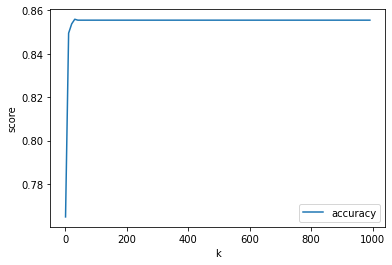

In [ ]:
plt.plot(range(1,1000,10), RandomForests_accuracy_list_mean, label='accuracy')
plt.xlabel('k')
plt.ylabel('score')
plt.legend()
plt.show()

In [ ]:
RandomForests_accuracy_list = []
for i in range(1,100,1):
  RandomForests=RandomForestClassifier(max_depth=i, random_state=0)
  RandomForests_accuracy_list.append(cross_val_score(RandomForests, X_train, y_train, cv=5))
RandomForests.fit(X_train,y_train)

RandomForestClassifier(max_depth=99, random_state=0)

In [ ]:
RandomForests_accuracy_list_mean = []
for i in range(99):
    RandomForests_accuracy_temp = 0
    for j in range(5):
        # add up the accuracy of each fold
        RandomForests_accuracy_temp+=RandomForests_accuracy_list[i][j]
    # get the mean of each fold
    RandomForests_accuracy_list_mean.append(RandomForests_accuracy_temp/5)

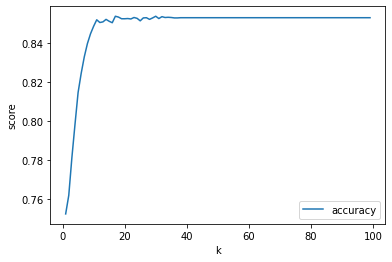

In [ ]:
plt.plot(range(1,100,1), RandomForests_accuracy_list_mean, label='accuracy')
plt.xlabel('k')
plt.ylabel('score')
plt.legend()
plt.show()

In [ ]:
RandomForests_accuracy_list_mean

[0.7575587749439859,
 0.7634329039294336,
 0.7793464025444805,
 0.7969688465417244,
 0.8108532291994651,
 0.8245233662345248,
 0.831465643124746,
 0.8394761820015424,
 0.8459908232599103,
 0.8475933873624744,
 0.8518650092862586,
 0.8529328719865292,
 0.8525054645182782,
 0.852184723534163,
 0.8525060349272844,
 0.8535735553821512,
 0.8551759483620135,
 0.8549621020256364,
 0.8533598231275754,
 0.8538939541208629,
 0.8522917322637023,
 0.8544273435824422,
 0.8558162324713312,
 0.8568847796624091,
 0.8547484838528618,
 0.853893782998161,
 0.8537869453913233,
 0.8531461479139002,
 0.852932472700225,
 0.8545348656800872,
 0.8546411328779188,
 0.8543207911801078,
 0.8548546940097926,
 0.8548545228870909,
 0.8546410758370182,
 0.8546410758370182,
 0.8543207341392073,
 0.8545342952710812,
 0.8545342952710812,
 0.8545342952710812,
 0.8545342952710812,
 0.8545342952710812,
 0.8545342952710812,
 0.8545342952710812,
 0.8545342952710812,
 0.8545342952710812,
 0.8545342952710812,
 0.85453429527108

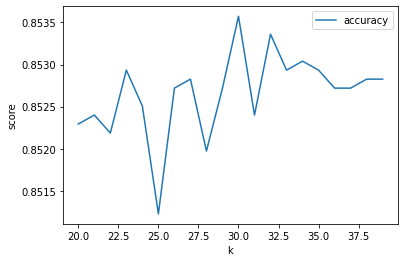

In [ ]:
plt.plot(range(20,40,1), RandomForests_accuracy_list_mean[19:39], label='accuracy')
plt.xlabel('k')
plt.ylabel('score')
plt.legend()
plt.show()

RandomForest Accuracy:  86.44405681535011 %
RandomForest Precision:  86.55777503629209 %
RandomForest Recall:  86.44405681535011 %
RandomForest F1 score:  86.43339497008215 %


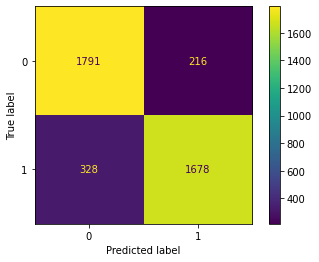

In [ ]:
RandomForest=RandomForestClassifier(max_depth=30, random_state=0)
RandomForest.fit(X_train,y_train)
RandomForest_y_pred, RandomForest_accuracy, RandomForest_precision, RandomForest_recall, RandomForest_f1 = evaluate(X_test,y_test, RandomForest)
print("RandomForest Accuracy: ", RandomForest_accuracy*100, "%")
print("RandomForest Precision: ", RandomForest_precision*100, "%")
print("RandomForest Recall: ", RandomForest_recall*100, "%")
print("RandomForest F1 score: ", RandomForest_f1*100, "%")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, RandomForest_y_pred))
disp.plot()
plt.show()